# SymPy - Python library for symbolic mathematics

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

In [1]:
import sympy as sp
from IPython.display import display

sp.init_printing() #sympy will return expressions as latex equations from this point

## Basic Operations

In [2]:
x = sp.symbols('x')
z, t = sp.symbols('z, t')

In [3]:
f = (x**2 + 3*z - z*x)/z
print(f)
display(f)

(x**2 - x*z + 3*z)/z


In [4]:
fsub = f.subs({x: 1, z: 5})
display(fsub)
display(fsub.evalf())

In [5]:
f2 = sp.sympify('x**2 + 3*z + z*x + k')
display(f2)

In [6]:
fsub2 = f2.subs({x: 1, z: 5})
display(fsub2)

In [7]:
fsub2 = f2.subs({x: 1, z: 5, k: 3})

NameError: name 'k' is not defined

In [9]:
fsub2 = f2.subs({x: 1, z: 5, 'k': 3})
display(fsub2)

In [10]:
f = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)

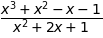

In [11]:
display(f)
display(sp.simplify(f))

In [144]:
a = sp.Rational(1, 3)
b = sp.Rational(9, 8)
display(a)
display(b)

In [145]:
print((a+b))

35/24


In [143]:
print((a+b).evalf())

0.958333333333333


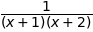

In [147]:
exp = 1/( (x+2)*(x+1) )
display(exp)

In [149]:
display(sp.apart(exp)) # partial fraction decomposition on a rational function

## Calculus

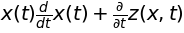

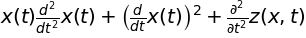

In [5]:
f3 = x(t)*x(t).diff(t) + z(x,t).diff(t)
display(f3)
df = f3.diff(t)
display(df)

In [6]:
sp.cos(x).diff()

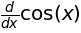

In [8]:
display(sp.Derivative(sp.cos(x)))
sp.Derivative(sp.cos(x)).doit()

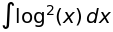

In [72]:
int_f = sp.Integral(sp.log(x)**2, x)
display(int_f)

In [73]:
int_f.doit()

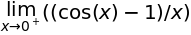

In [81]:
lim_cos = sp.Limit((sp.cos(x) - 1)/x, x, 0)
display(lim_cos)
lim_cos.doit()

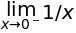

In [83]:
lim_cos = sp.Limit(1/x, x, 0, '-')
display(lim_cos)
lim_cos.doit()

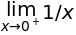

In [84]:
lim_cos = sp.Limit(1/x, x, 0, '+')
display(lim_cos)
lim_cos.doit()

## Ordinary Differential Equation

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
u = sp.symbols('u')
t = sp.symbols('t')
y = sp.Function('y')

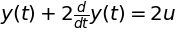

In [12]:
eq = sp.Eq(2*y(t).diff(t)+y(t), 2*u)
display(eq)

In [16]:
y_sl0 = sp.dsolve(eq, y(t)).rhs
display(y_sl0)
type(y_sl0)

sympy.core.add.Add

In [18]:
y0 = 0

cnd0 = sp.Eq(y_sl0.subs(t, 0), y0)
display(cnd0)

In [21]:
C1 = sp.symbols("C1") 
C1_sl = sp.solve([cnd0], (C1))
display(C1_sl)

In [22]:
display(y_sl0)
display(y_sl0.subs(C1_sl))
y_sl1 = sp.simplify(y_sl0.subs(C1_sl))
display(y_sl1)

In [111]:
y_sl1.subs({u: 1, y0: 0, t: 2}).evalf()

In [112]:
0.632*2

In [113]:
nys = [y_sl1.subs({u: 1, y0: 0, t: x}).evalf() for x in np.arange(0,20,0.1)]

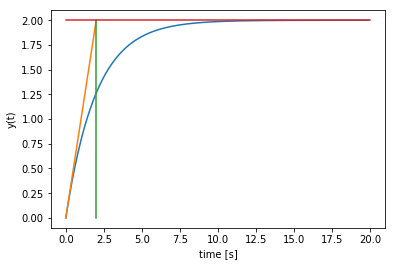

In [118]:
plt.plot(np.arange(0,20,0.1), nys)
plt.plot([0,2], [0,2])
plt.plot([2,2], [0,2])
plt.plot([0,20], [2,2])
plt.xlabel('time [s]')
plt.ylabel('y(t)')
plt.show()